In [1]:
#加工なしデータ×vgg-19モデル×SGD

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import japanize_matplotlib
from torchviz import make_dot
from torchinfo import summary
from IPython.display import display
from tqdm.notebook import tqdm
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
device = torch.device("cpu")
print(device)

cpu


In [3]:
!git clone https://github.com/makaishi2/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


In [4]:
!tree 加工なし画像

加工なし画像
├── test
│   ├── endo
│   │   ├── endo36.JPG
│   │   ├── endo37.JPG
│   │   ├── endo38.JPG
│   │   ├── endo39.JPG
│   │   ├── endo40.JPG
│   │   ├── endo41.JPG
│   │   ├── endo42.JPG
│   │   ├── endo43.JPG
│   │   ├── endo44.JPG
│   │   ├── endo45.JPG
│   │   ├── endo46.JPG
│   │   ├── endo47.JPG
│   │   ├── endo48.JPG
│   │   ├── endo49.JPG
│   │   └── endo50.JPG
│   ├── kaki
│   │   ├── kaki36.JPG
│   │   ├── kaki37.JPG
│   │   ├── kaki38.JPG
│   │   ├── kaki39.JPG
│   │   ├── kaki40.JPG
│   │   ├── kaki41.JPG
│   │   ├── kaki42.JPG
│   │   ├── kaki43.JPG
│   │   ├── kaki44.JPG
│   │   ├── kaki45.JPG
│   │   ├── kaki46.JPG
│   │   ├── kaki47.JPG
│   │   ├── kaki48.JPG
│   │   ├── kaki49.JPG
│   │   └── kaki50.JPG
│   ├── kubo
│   │   ├── kubo36.JPG
│   │   ├── kubo37.JPG
│   │   ├── kubo38.JPG
│   │   ├── kubo39.JPG
│   │   ├── kubo40.JPG
│   │   ├── kubo41.JPG
│   │   ├── kubo42.JPG
│   │   ├── kubo43.JPG
│   │   ├── kubo44.JPG
│   │   ├── kubo45.JPG
│   │   ├── kubo46.JPG
│ 

In [5]:
test_transform = transforms.Compose([transforms.Resize(224),transforms.CenterCrop(224),
                                     transforms.ToTensor(),transforms.Normalize(0.5, 0.5)])

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),  transforms.Resize(224), transforms.CenterCrop(224),
                                      transforms.ToTensor(), transforms.Normalize(0.5, 0.5),
                                      transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)])

In [6]:
data_dir='加工なし画像'

import os
train_dir=os.path.join(data_dir,'train')
test_dir=os.path.join(data_dir,'test')

classes=['endo','kaki','kubo','nagi','yama']

train_data=datasets.ImageFolder(train_dir,transform=train_transform)
train_data2=datasets.ImageFolder(train_dir,transform=test_transform)
test_data=datasets.ImageFolder(test_dir,transform=test_transform)

In [7]:
print(f' 学習データ:{len(train_data)}件')
print(f' 検証データ:{len(test_data)}件')

 学習データ:175件
 検証データ:75件


In [8]:
batch_size=10

train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)

train_loader2=DataLoader(train_data2,batch_size=175,shuffle=True)

test_loader=DataLoader(test_data,batch_size=batch_size, shuffle=False)

test_loader2=DataLoader(test_data,batch_size=75,shuffle=True)

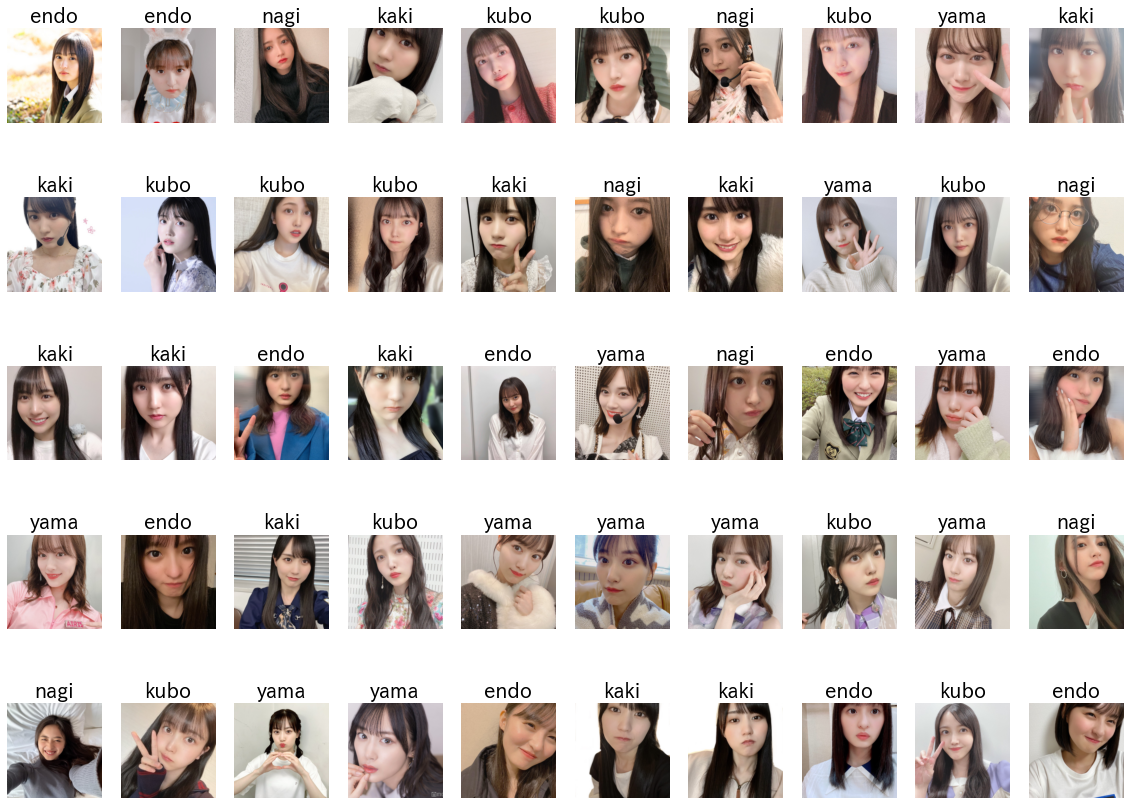

In [9]:
torch_seed()
show_images_labels(train_loader2,classes,None,None)

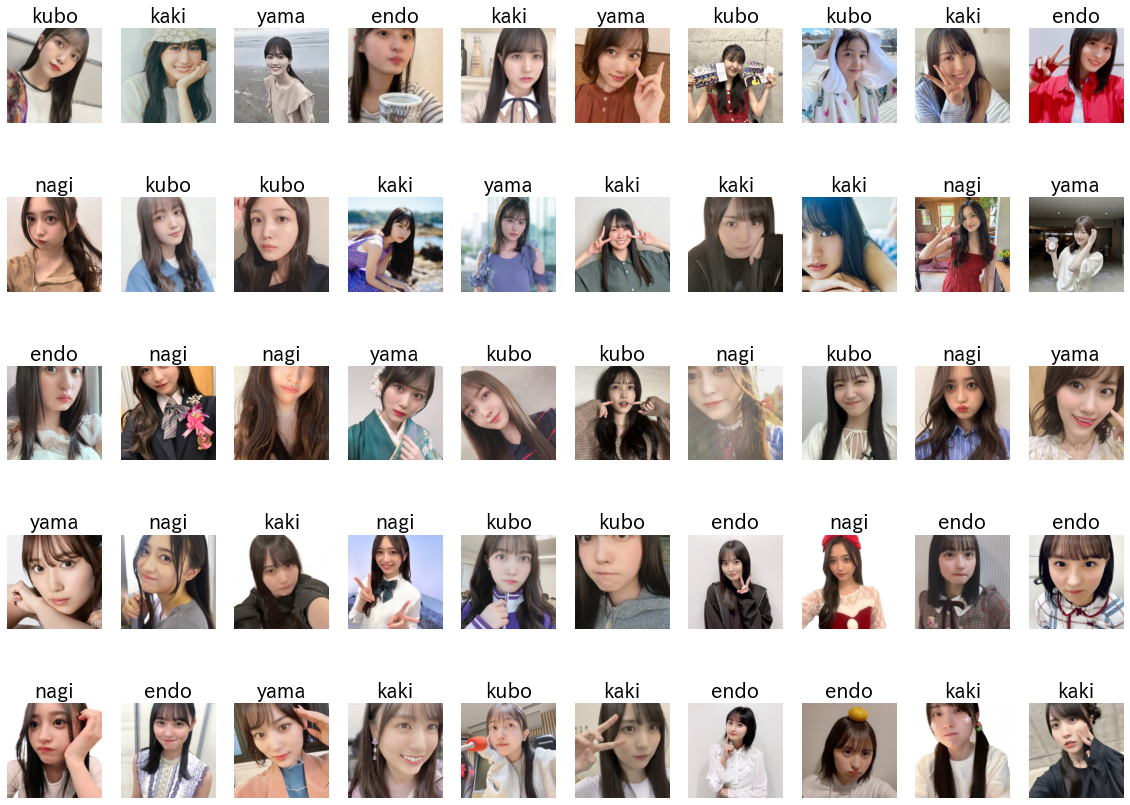

In [10]:
torch_seed()

show_images_labels(test_loader2, classes, None, None)

In [11]:
from torchvision import models
net=models.vgg19_bn(pretrained=True)

for param in net.parameters():
    param.requires_grad=False

torch_seed()

in_features=net.classifier[6].in_features
net.classifier[6]=torch.nn.Linear(in_features, 5)

net.avgpool=torch.nn.Identity()

net=net.to(device)

lr=0.001

criterion=torch.nn.CrossEntropyLoss()

optimizer=optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

history = np.zeros((0, 5))

/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shige/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
num_epochs=30

history=fit(net,optimizer,criterion,num_epochs,train_loader,test_loader,device,history)

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [1/30], loss: 1.62509 acc: 0.21143 val_loss: 1.55092, val_acc: 0.34667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [2/30], loss: 1.38091 acc: 0.49714 val_loss: 1.45191, val_acc: 0.44000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [3/30], loss: 1.24762 acc: 0.51429 val_loss: 1.42242, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [4/30], loss: 1.10195 acc: 0.60000 val_loss: 1.36325, val_acc: 0.42667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [5/30], loss: 1.03750 acc: 0.64571 val_loss: 1.35255, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.95919 acc: 0.65143 val_loss: 1.31586, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.84797 acc: 0.70286 val_loss: 1.30372, val_acc: 0.48000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.87140 acc: 0.67429 val_loss: 1.30109, val_acc: 0.49333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.76601 acc: 0.78286 val_loss: 1.29795, val_acc: 0.46667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.84718 acc: 0.69143 val_loss: 1.31642, val_acc: 0.50667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.85206 acc: 0.71429 val_loss: 1.34682, val_acc: 0.45333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.84196 acc: 0.66286 val_loss: 1.32261, val_acc: 0.48000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.64863 acc: 0.79429 val_loss: 1.29523, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.66581 acc: 0.80571 val_loss: 1.28378, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.69480 acc: 0.74857 val_loss: 1.32262, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.73191 acc: 0.72571 val_loss: 1.32551, val_acc: 0.57333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.65611 acc: 0.76571 val_loss: 1.28411, val_acc: 0.49333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.60424 acc: 0.82286 val_loss: 1.27889, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.57395 acc: 0.83429 val_loss: 1.28935, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.70540 acc: 0.72571 val_loss: 1.29712, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.58496 acc: 0.81714 val_loss: 1.28763, val_acc: 0.57333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.62365 acc: 0.77714 val_loss: 1.29609, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.58115 acc: 0.80571 val_loss: 1.28128, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.65722 acc: 0.74857 val_loss: 1.30311, val_acc: 0.52000


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.61076 acc: 0.80000 val_loss: 1.28103, val_acc: 0.50667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.49333 acc: 0.82857 val_loss: 1.28434, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.59469 acc: 0.82857 val_loss: 1.27631, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.47958 acc: 0.85143 val_loss: 1.29097, val_acc: 0.54667


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.64165 acc: 0.78286 val_loss: 1.34644, val_acc: 0.53333


  0%|          | 0/18 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.57098 acc: 0.82857 val_loss: 1.31775, val_acc: 0.56000


初期状態: 損失: 1.55092 精度: 0.34667
最終状態: 損失: 1.31775 精度: 0.56000


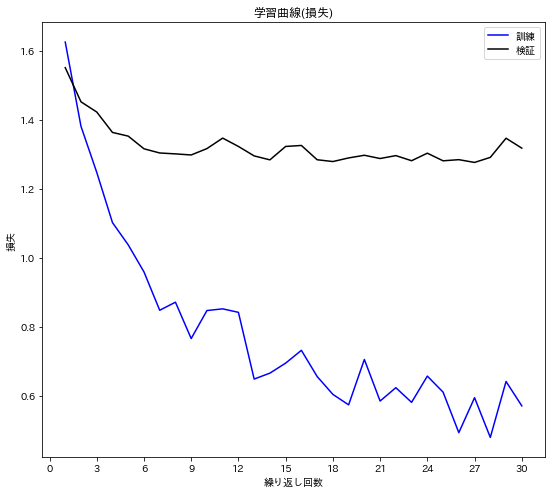

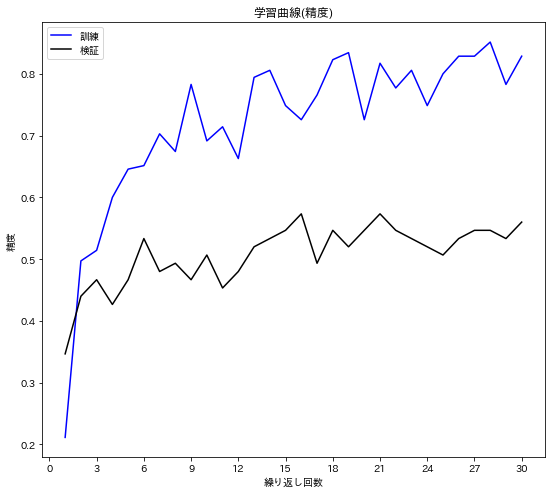

In [13]:
evaluate_history(history)

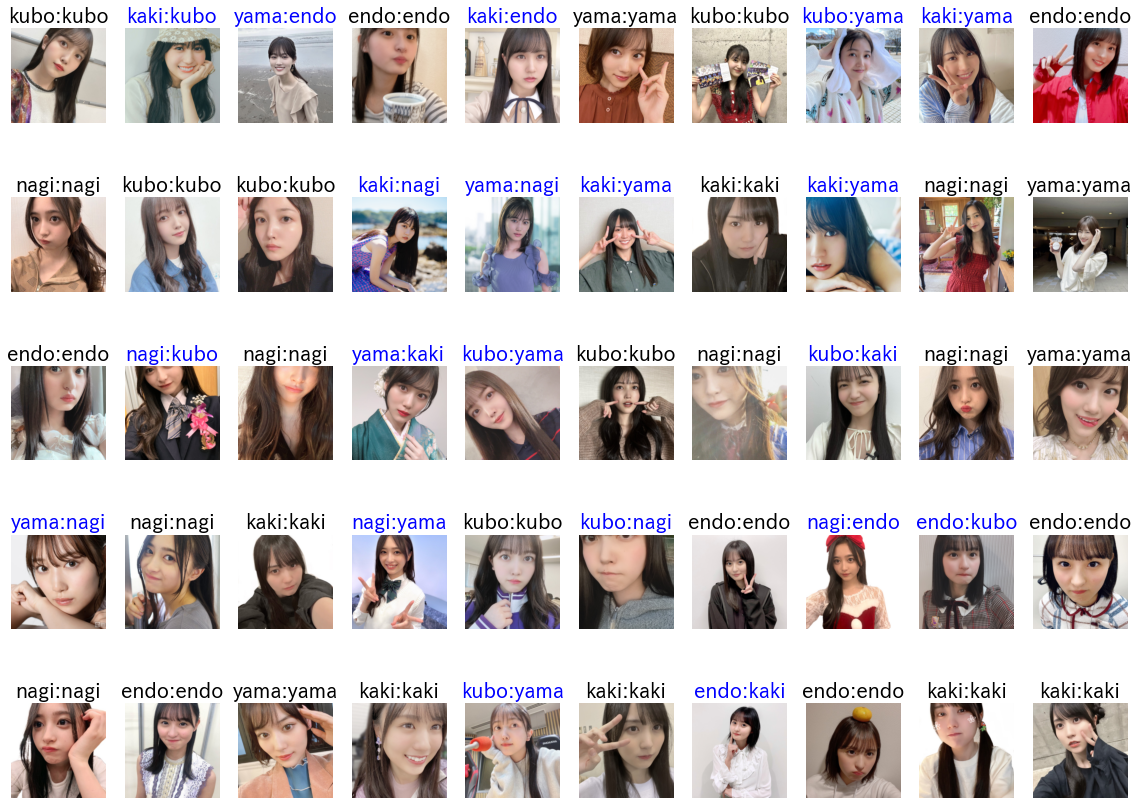

In [14]:
torch_seed()

show_images_labels(test_loader2,classes,net,device)